In [7]:
import numpy as np 
from helpers import * 
from implementations import *
from utilities import *
import matplotlib.pyplot as plt

In [141]:
# hyperparameter tuning with only a part of the dataset
MAX_ROWS = 20000

x_data = np.genfromtxt('data/dataset/x_train.csv', delimiter=",", skip_header=1)#, max_rows=MAX_ROWS)
y_data = np.genfromtxt('data/dataset/y_train.csv', delimiter=",", skip_header=1)#, max_rows=MAX_ROWS)

In [142]:
x_data = clean_X_0(x_data)  # replace nan with zero add bias column
y_data = clean_Y(y_data)

x_train, x_test, y_train, y_test = split_data(x_data, y_data, 0.8)

In [3]:
# comparison balanced and unbalanced data

N, D = x_train.shape
initial_w = np.random.rand(D)

w, loss = logistic_regression(y_train.reshape(-1, 1), x_train, initial_w.reshape(-1, 1), 10000, 0.01)
pred = predict_logistic(x_test, w)
print(f'unbalanced data, accuracy={np.sum(pred == y_test) / len(y_test)} f1-score={compute_f1(y_test, pred)}')

initial_w = np.random.rand(D)
x_data, y_data = balance_dataset(x_train, y_train)  # create balaced dataset with oversampling

w, loss = logistic_regression(y_data.reshape(-1, 1), x_data, initial_w.reshape(-1, 1), 10000, 0.01)
pred = predict_logistic(x_test, w)
print(f'balanced data, accuracy={np.sum(pred == y_test) / len(y_test)} f1-score={compute_f1(y_test, pred)}')


# with maxrow = 100k unbalanced is better than balanced


/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


unbalanced data, accuracy=0.5895 f1-score=0.2502283105022831
balanced data, accuracy=0.6015 f1-score=0.2708142726440988


In [6]:
# hyperparamter tuning
initial_w = np.random.rand(x_data.shape[1])

best_lambda, best_gamma = hyperparameter_tuning(x_data, y_data , reg_logistic_regression,lambdas= [0, 1e-4, 1e-5], 
                            gammas=[0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], model_params={'initial_w': initial_w ,'max_iters': 10000})

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


 lambda= 0 gamma= 0.01 , CV accuracy = 0.9074, f1_score = 0.2911
 lambda= 0.0001 gamma= 0.01 , CV accuracy = 0.9058, f1_score = 0.2656
 lambda= 1e-05 gamma= 0.01 , CV accuracy = 0.9059, f1_score = 0.2732
 lambda= 0 gamma= 0.05 , CV accuracy = 0.9099, f1_score = 0.2877
 lambda= 0.0001 gamma= 0.05 , CV accuracy = 0.9094, f1_score = 0.2983
 lambda= 1e-05 gamma= 0.05 , CV accuracy = 0.9101, f1_score = 0.2832
 lambda= 0 gamma= 0.1 , CV accuracy = 0.9096, f1_score = 0.3013
 lambda= 0.0001 gamma= 0.1 , CV accuracy = 0.9081, f1_score = 0.2759
 lambda= 1e-05 gamma= 0.1 , CV accuracy = 0.9101, f1_score = 0.2978
 lambda= 0 gamma= 0.15 , CV accuracy = 0.9078, f1_score = 0.2952
 lambda= 0.0001 gamma= 0.15 , CV accuracy = 0.9105, f1_score = 0.2873
 lambda= 1e-05 gamma= 0.15 , CV accuracy = 0.9075, f1_score = 0.2757
 lambda= 0 gamma= 0.2 , CV accuracy = 0.9085, f1_score = 0.2938
 lambda= 0.0001 gamma= 0.2 , CV accuracy = 0.9080, f1_score = 0.2920
 lambda= 1e-05 gamma= 0.2 , CV accuracy = 0.9112, f1_s

(0.0001, 0.25)

[[0.2        0.34841629]
 [0.21       0.3364486 ]
 [0.22       0.33415233]
 [0.23       0.33924051]
 [0.24       0.33246753]
 [0.25       0.33952255]
 [0.26       0.34501348]
 [0.27       0.34903047]
 [0.28       0.35492958]
 [0.29       0.36416185]
 [0.3        0.35882353]
 [0.31       0.35435435]
 [0.32       0.35474006]
 [0.33       0.35625   ]
 [0.34       0.34920635]
 [0.35       0.33663366]
 [0.36       0.33670034]
 [0.37       0.33220339]
 [0.38       0.33217993]
 [0.39       0.33215548]
 [0.4        0.33451957]
 [0.41       0.3381295 ]
 [0.42       0.33454545]
 [0.43       0.33948339]
 [0.44       0.33962264]
 [0.45       0.32061069]
 [0.46       0.31496063]
 [0.47       0.31020408]
 [0.48       0.31147541]
 [0.49       0.29411765]
 [0.5        0.27966102]
 [0.51       0.26495726]
 [0.52       0.26839827]
 [0.53       0.26315789]
 [0.54       0.26548673]
 [0.55       0.25112108]
 [0.56       0.23636364]
 [0.57       0.2293578 ]
 [0.58       0.22119816]
 [0.59       0.20465116]]

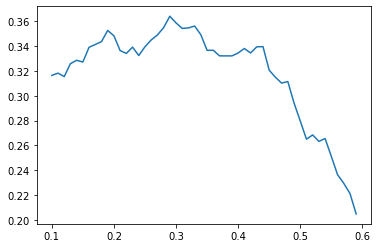

In [7]:
# choosing the best threshold, especially relevant here as dataset is unbalanced

initial_w = np.random.rand(x_train.shape[1])
# train with best hyperparameter found above
w, loss = reg_logistic_regression(y_train.reshape(-1, 1), x_train, 1e-05, initial_w.reshape(-1, 1), 10000, 0.25)

f1_scores = []
for threshold in np.arange(0.1, 0.6, 0.01).tolist(): 
    y_pred = (sigmoid(x_test @ w) >= threshold).flatten() 
    f1_scores.append([threshold, compute_f1(y_test, y_pred)])

best_threshold = max(f1_scores, key=lambda x: x[1])
f1_scores = np.array(f1_scores)
plt.plot(f1_scores[:, 0], f1_scores[:, 1])

In [3]:

# load dataset for final training
x_data = np.genfromtxt('data/dataset/x_train.csv', delimiter=",", skip_header=1)
y_data = np.genfromtxt('data/dataset/y_train.csv', delimiter=",", skip_header=1)
x_test = np.genfromtxt('data/dataset/x_test.csv', delimiter=",", skip_header=1)

# clean data
x_test_clean = clean_X_median(x_test)
y_data = clean_Y(y_data)
x_data = clean_X_median(x_data)

initial_w = np.random.rand(x_data.shape[1])

# train with optimal hyperparameters
w, loss = reg_logistic_regression(y_data.reshape(-1, 1), x_data, 1e-5, initial_w.reshape(-1, 1), 10000, 0.25)  # replace with best lambda, gamma

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


In [5]:
# predict with optimal threshold
y_pred = (sigmoid(x_test_clean @ w) >= 0.5).flatten()  # replace best threshold
y_pred = np.where(y_pred, 1, -1)

create_csv_submission(x_test[:, 0], y_pred, 'prediction.csv')

((y_pred == 1).sum() / len(y_pred)) * 100

42.276853875058286

In [76]:
def reg_logistic_regression_batch(y, tx, initial_w, lambda_, max_iters, gamma):
    batch_size = 1000
    half = False
    w = initial_w
    losses = []
    for _ in range(max_iters):
        random_indices = np.random.choice(len(y), size=batch_size, replace=False)
        batch_tx = tx[random_indices]
        batch_y = y[random_indices]
        sigmoids, loss = compute_logistic_loss(batch_y, batch_tx, w)
        grad = batch_tx.T.dot(sigmoids - batch_y) / batch_size + 2 * lambda_ * w
        w = w - gamma * grad #weighted_grad / len(y)  # check if dividing actually makes sense
        losses.append(loss)
        if len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-3 and not half: 
            half = True
            gamma = gamma/2
        elif len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-5: 
            break
    return w, losses

In [143]:
w, losses = reg_logistic_regression_batch(y_train, x_train, np.random.rand(x_train.shape[1]), 0, 10000, 0.25)

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/tmp/ipykernel_4899/1594625279.py:14: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-3 and not half:
/tmp/ipykernel_4899/1594625279.py:17: RuntimeWarning: invalid value encountered in double_scalars
  elif len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 3e-5:


In [152]:
w, losses = reg_logistic_regression_batch(cleaned_data_y, cleaned_data_x, np.random.rand(x_train.shape[1]), 1e-5, 10000, 0.2)

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/tmp/ipykernel_4899/1594625279.py:14: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-3 and not half:
/tmp/ipykernel_4899/1594625279.py:17: RuntimeWarning: invalid value encountered in double_scalars
  elif len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 3e-5:


f1-score : 0.40833508735003154, accuracy 0.8715010590153442


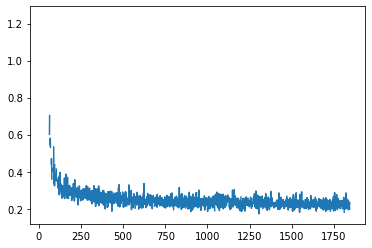

In [147]:
def predict_logistic(X, w, t): 
    return (sigmoid(X @ w) >= t).flatten()

y_pred = predict_logistic(x_test, w, 0.2)

print(f'f1-score : {compute_f1(y_test, y_pred)}, accuracy {(y_test == y_pred).sum() / len(y_pred)}')
plt.plot(losses)
plt.show()

In [149]:
w, losses = reg_logistic_regression_batch(y_data, x_data, np.random.rand(x_train.shape[1]), 0, 10000, 0.25)

x_test = np.genfromtxt('data/dataset/x_test.csv', delimiter=",", skip_header=1)

x_test_clean = clean_X_0(x_test)

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/tmp/ipykernel_4899/1594625279.py:14: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-3 and not half:
/tmp/ipykernel_4899/1594625279.py:17: RuntimeWarning: invalid value encountered in double_scalars
  elif len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 3e-5:


In [153]:
y_pred = (sigmoid(x_test_clean @ w) >= 0.2).flatten()
y_pred = np.where(y_pred, 1, -1)

create_csv_submission(x_test[:, 0], y_pred, 'prediction.csv')

((y_pred == 1).sum() / len(y_pred)) * 100

13.201802905493743

In [139]:
initial_w = np.random.rand(x_data.shape[1])

best_lambda, best_gamma, best_threshold = hyperparameter_tuning(x_data, y_data , reg_logistic_regression_batch,lambdas= [0, 1e-4, 1e-5], 
                                            gammas=[0.1, 0.15, 0.2, 0.25, 0.3], thresholds=[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
                                            model_params={'initial_w': initial_w ,'max_iters': 10000})

# best

/tmp/ipykernel_4899/1594625279.py:14: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-3 and not half:
/tmp/ipykernel_4899/1594625279.py:17: RuntimeWarning: invalid value encountered in double_scalars
  elif len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 3e-5:


 lambda= 0, gamma= 0.1, threshold = 0.1 CV accuracy = 0.7925, f1_score = 0.3533
 lambda= 0, gamma= 0.1, threshold = 0.15 CV accuracy = 0.8239, f1_score = 0.3566
 lambda= 0, gamma= 0.1, threshold = 0.2 CV accuracy = 0.8647, f1_score = 0.3805
 lambda= 0, gamma= 0.1, threshold = 0.25 CV accuracy = 0.8714, f1_score = 0.3479
 lambda= 0, gamma= 0.1, threshold = 0.3 CV accuracy = 0.8760, f1_score = 0.3368
 lambda= 0, gamma= 0.1, threshold = 0.35 CV accuracy = 0.8940, f1_score = 0.3228
 lambda= 0, gamma= 0.1, threshold = 0.4 CV accuracy = 0.8884, f1_score = 0.2955
 lambda= 0.0001, gamma= 0.1, threshold = 0.1 CV accuracy = 0.7927, f1_score = 0.3555
 lambda= 0.0001, gamma= 0.1, threshold = 0.15 CV accuracy = 0.8376, f1_score = 0.3772
 lambda= 0.0001, gamma= 0.1, threshold = 0.2 CV accuracy = 0.8572, f1_score = 0.3684
 lambda= 0.0001, gamma= 0.1, threshold = 0.25 CV accuracy = 0.8740, f1_score = 0.3498
 lambda= 0.0001, gamma= 0.1, threshold = 0.3 CV accuracy = 0.8831, f1_score = 0.3379
 lambda= 0

In [140]:
best_lambda, best_gamma, best_threshold

(0, 0.25, 0.25)

In [138]:

def hyperparameter_tuning(X, y, model, lambdas, gammas, thresholds, model_params,  k=5):
    """
    Tune hyperparameter using k-fold cross-validation.

    Parameters:
    - X: features
    - y: targets
    - model_class: a class of the model that accepts the hyperparameter in its constructor
    - param_name: name of the hyperparameter to be tuned
    - param_values: list of values for the hyperparameter
    - k: number of folds for cross-validation

    Returns:
    - best_param_value: the value of the hyperparameter that gives the best cross-validation accuracy
    """
    best_accuracy = 0
    best_f1_score = 0
    best_param_lambda = None
    best_param_gamma = None
    best_param_threshold = None
    
    for gamma in gammas: 
        for lambda_ in lambdas: 
            for threshold in thresholds: 
                
                model_params['lambda_'] = lambda_
                model_params['gamma'] = gamma
                accuracy, f1_score = k_fold_cross_validation(X, y, model, k, model_params, threshold)
                
                if f1_score > best_f1_score and accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_f1_score = f1_score
                    best_param_lambda = lambda_
                    best_param_gamma = gamma
                    best_param_threshold = threshold
                    
                print(f" lambda= {lambda_}, gamma= {gamma}, threshold = {threshold} CV accuracy = {accuracy:.4f}, f1_score = {f1_score:.4f}")
        
    return best_param_lambda, best_param_gamma, best_param_threshold


In [151]:
def remove_rows_by_indices(matrix, indices_to_remove):
    # Create a mask to select rows that are not in the list of indices to remove
    mask = np.ones(matrix.shape[0], dtype=bool)
    mask[indices_to_remove] = False

    # Apply the mask to the matrix to remove specified rows
    cleaned_matrix = matrix[mask]

    return cleaned_matrix

def remove_outliers_from_matrix(x_data, y_data, max_deviations):
    # Calculate the mean and standard deviation for the entire matrix
    mean = np.mean(x_data, axis=0)
    #print("mean = ", mean)
    std = np.std(x_data, axis=0)
    #print("std = ",std)
    
    # Calculate the absolute deviation from the mean for the entire matrix
    distance_from_mean = []
    for i in range(x_data.shape[0]):
        distance_from_mean.append( np.abs(x_data[i] - mean))
    #print("distance = ", distance_from_mean)

    distance_from_mean = np.array(distance_from_mean)

    #print("max_deviations * std = ", max_deviations * std)

    # Create a mask to identify outliers based on the absolute deviation
    outlier_sample = distance_from_mean > max_deviations * std

    #print("outlier samples = \n", outlier_sample)
    count = np.zeros(x_data.shape[0])
    samples_to_drop = []
    for i in range(x_data.shape[0]):
        count[i] = np.count_nonzero(outlier_sample[i])
        if count[i] > 0.6 * x_data.shape[1]:
            samples_to_drop.append(i)
    #print("count = ", count)
    #print("to drop = ", samples_to_drop)

    x_data_cleaned = remove_rows_by_indices(x_data, samples_to_drop)
    y_data_cleaned = remove_rows_by_indices(y_data, samples_to_drop)
    
    return x_data_cleaned, y_data_cleaned


# Example usage:
# Create a sample data matrix with outliers
data_matrix = np.array([[1, 1, 1],
                        [4, 5, 6],
                        [7, 80000, 900000],
                        [20000, 10000, 10000000],
                        [-20000, -10000, -10000000]])  # Outlier in each column 

# Remove outliers from the matrix using the function
cleaned_data_x, cleaned_data_y = remove_outliers_from_matrix(x_data,y_data,0.28)

print("Original Data:")
print(x_data.shape)
print("\nCleaned Data:")
print(cleaned_data_x.shape)

Original Data:
(328135, 322)

Cleaned Data:
(326910, 322)
